In [125]:
import serial
from anatomical_hinge_nagillimi.anatomical_hinge import AnatomicalHinge
from anatomical_hinge_nagillimi.data import Data
from anatomical_hinge_nagillimi.result.joint_result import HingeJointResult

hinge = AnatomicalHinge()
ser = serial.Serial("COM5", 38400)

print("Connected to port: ", ser.portstr)
print("Incoming data config")
print(ser.readline())
serialData = ser.readline()
print("Length of packet:", len(serialData))
print("Packet type:", type(serialData), type(serialData[0]))
print("First timestamp:", int(serialData[0]), "\n")

Connected to port: COM5
Incoming data config
b'CONFIG: [ts, pot, ax1, ay1, az1, gx1, gy1, gz1, ax2, ay2, az2, gx2, gy2, gz2]\r\n'
Length of packet: 71
Packet type: <class 'bytes'> <class 'int'>
First timestamp: 50 



In [126]:
# env constants
max_raw_range = 16384 * 2
g_per_raw_range = 2 / max_raw_range
dps_per_raw_range = 250 / max_raw_range

In [127]:
import math

# Define the read data function
def readData():
    byteData = ser.readline().split(b"\x09")
    ts = int(byteData[0]) / 1000
    a1 = [
        float(byteData[1]) * g_per_raw_range,
        float(byteData[2]) * g_per_raw_range,
        float(byteData[3]) * g_per_raw_range
    ]
    g1 = [
        math.radians(float(byteData[4]) * dps_per_raw_range),
        math.radians(float(byteData[5]) * dps_per_raw_range),
        math.radians(float(byteData[6]) * dps_per_raw_range)
    ]
    a2 = [
        float(byteData[7]) * g_per_raw_range,
        float(byteData[8]) * g_per_raw_range,
        float(byteData[9]) * g_per_raw_range
    ]
    g2 = [
        math.radians(float(byteData[10]) * dps_per_raw_range),
        math.radians(float(byteData[11]) * dps_per_raw_range),
        math.radians(float(byteData[12]) * dps_per_raw_range)
    ]
    return hinge.update(Data(int(ts), a1, g1, a2, g2))

In [128]:
# Calibrate
byteData = ser.readline().split(b"\x09")
while len(byteData) != 0:
    readData()
    if hinge.status == HingeJointResult.STREAMING: break

Axis solution iteration = 1
Axis solution iteration = 2
Axis solution iteration = 3
Axis solution iteration = 4
Axis solution iteration = 5
Axis solution iteration = 6
Axis solution iteration = 7
Axis solution iteration = 8
Axis solution iteration = 9
Axis solution iteration = 10
Axis solution iteration = 11
Axis solution iteration = 12
Axis solution iteration = 13
Axis solution iteration = 14
Axis solution iteration = 15
Axis solution iteration = 16
Axis solution iteration = 17
Axis solution iteration = 18
Axis solution iteration = 19
Axis solution iteration = 20
Axis solution iteration = 21
Axis solution iteration = 22
Axis solution iteration = 23
Axis solution iteration = 24
Axis solution iteration = 25
Axis solution iteration = 26
Axis solution iteration = 27
Axis solution iteration = 28
Axis solution iteration = 29
Axis solution iteration = 30
Axis solution iteration = 31
Axis solution iteration = 32
Axis solution iteration = 33
Axis solution iteration = 34
Axis solution iteration

C:\Users\bmill\AppData\Local\Temp\ipykernel_12204\2600730704.py:29: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, fargs=(ys,), interval=50, blit=True)


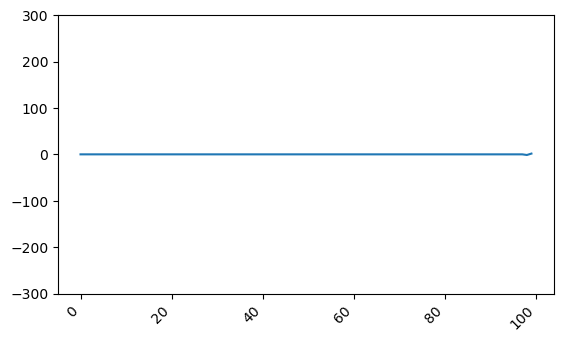

In [141]:
from time import sleep
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x_len = 100
xs = list(range(0, x_len))
ys = [0] * x_len
ax.set_ylim(-300, 300)

line, = ax.plot(xs, ys)

# Format plot
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.30)

def animate(i, ys):
    data = readData()
    # print(data)
    ys.append(data)
    ys = ys[-x_len:]
    line.set_ydata(ys)
    return line,

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(ys,), interval=50, blit=True)
plt.show()

sleep(10000)